In [152]:
import scipy.integrate as integrate #nsubmodule
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

Added lambda, fixed integral, P cannot be all same otherwise singular matrix

also, nan will occur when a value negative.

In [135]:
num_GTO = int(input('how many GTOs?'))

#to set integral to 0 if toggle0 == 0
toggle0 = 1

# initial value of P
#P = np.zeros(2*num_GTO + 1) + 0.1
P = np.array([i*0.1 for i in range (1,2*num_GTO + 2)])

#add GTOs to chi
str_chi = 'd[0]*GTO_1(r,a[0])'

for i in range(2, num_GTO +1):
    str_chi += '+ d[{0}]*GTO_1(r,a[{0}]) '.format(i-1)
    
#str_chi += '\n'

GTO_1 = lambda r,a: (2*a/pi)**(3/4)*np.exp(-a*r**2)
STO_1 = lambda r: pi**(-1/2)*np.exp(-r)

#par_GTO_a = lambda r,i: (GTO_1(r,a[i-1]))
#par_GTO_d = lambda r,i: (GTO_1(r,a[i-1]))*(3/(4*a[i-1] - r**2))

def par_GTO(r,i):
    global toggle0
    if i <= num_GTO:
        #a_i derivative
        return d[i-1]*(3/(4*a[i-1]) - r**2)*GTO_1(r,a[i-1])
    elif i > num_GTO:
        #b_i derivative
        return GTO_1(r,a[i-1-num_GTO])
    '''
    elif i == 2*num_GTO + 1:
        toggle0 = 0
        return 0
    '''

def double_par_GTO(r,j,k):
    global toggle0
    if j==k:
        if j <= num_GTO:
            return d[j-1]*((3/(4*a[j-1]) - r**2)**2 - 3/(4*a[j-1]**2))*GTO_1(r,a[j-1])
        else:
            #print('here1', j, k)
            toggle0 = 0
            return 0
    elif max(j,k) > num_GTO and min(j,k) <= num_GTO:
        #a_i and d_i derivative
        i = min(j,k)
        return (3/(4*a[i-1]) - r**2)*(GTO_1(r,a[i-1]))
    else:
        #print('here2', j, k)
        toggle0 = 0
        return 0

def integ(x):
    global toggle0
    '''
    if x(1) == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        print('here')
        
        return 0
    '''
    x(1) # evaluate anonymous function
    if toggle0 == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        #print('here')
        toggle0 = 1
        return 0
    else:
        #print(toggle0)
        #return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]
        return integrate.quad(lambda r: x(r)*4*pi*r**2 ,0, np.inf)[0]
'''
def integ(x):
    return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]
'''

how many GTOs? 2


'\ndef integ(x):\n    return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]\n'

In [115]:
#a array
a = P[0 : num_GTO]
#d list
d = P[num_GTO : 2*num_GTO]

lambd = P[2*num_GTO]

main = '''
#All integral definitions
B_integral = lambda i : -integ(lambda r:(STO_1(r) - (1-lambd)*{0})*par_GTO(r,i))

lambd_integral = lambda i : -integ(lambda r:{0}*par_GTO(r,i))

W_integral = lambda j,k : (1-lambd)*(integ(lambda r: par_GTO(r,j)*par_GTO(r,k))\
+ integ(lambda r: {0}*double_par_GTO(r,j,k)))\
- integ(lambda r: (STO_1(r)*double_par_GTO(r,j,k)))

#B
list_B = [B_integral(i) for i in range(1,2*num_GTO + 1)] + \
[0.5*(1 - integ(lambda r: ({0}**2 )))]
array_B = np.array(list_B)

#for our lagrange multiplier
last_row = [lambd_integral(k) for k in range (1,2*num_GTO+1)]\
+[0]

'''.format(str_chi)

exec(main)

# list_W contains many lists, which are rows each
list_W = [[W_integral(j,k) for k in range (1,2*num_GTO+1)]\
          + [lambd_integral(j)] for j in range (1,2*num_GTO+1)]\
            + [last_row]

array_W = np.array(list_W)

solution = np.linalg.solve(array_W, array_B)
P += solution

print(P)

[ -0.0633623    0.23022926  13.40535664 -12.82325082  -1.70431795]


In [7]:
W_integral(1,2)

<ipython-input-3-3caf6e82ea36>:49: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]


nan

In [9]:
r=1
double_par_GTO(r,1,2)

0

In [36]:
after = list_W

In [32]:
before = list_W

In [37]:
after == before

True

In [68]:
list_W

[[2.728045134181815,
  0.11778830987380788,
  -3.058861837273679,
  -3.004498001947306,
  0.16869774820068073],
 [0.11778830987380788,
  1.808882170532462,
  -2.56818082399854,
  -2.5319382671142914,
  0.16847920011896667],
 [-3.058861837273679,
  -2.56818082399854,
  0.07917958419292034,
  0.07248511376849724,
  0.1687705975612521],
 [-3.004498001947306,
  -2.5319382671142914,
  0.07248511376849724,
  0.07917958418821759,
  0.1687975100051505],
 [-0.16869774820068073,
  -0.16847920011896667,
  -0.1687705975612521,
  -0.1687975100051505,
  0]]

In [101]:
#a array
a = P[0 : num_GTO]
#d list
d = P[num_GTO : 2*num_GTO]

lambd = P[2*num_GTO]

main = '''
#All integral definitions
B_integral = lambda i : integ(lambda r:(STO_1(r) - (1+lambd)*{0})*par_GTO(r,i))

lambd_integral = lambda i : integ(lambda r:{0}*par_GTO(r,i))

W_integral = lambda j,k : (1-lambd)*(integ(lambda r: par_GTO(r,j)*par_GTO(r,k))\
+ integ(lambda r: {0}*double_par_GTO(r,j,k)))\
- integ(lambda r: (STO_1(r)*double_par_GTO(r,j,k)))

#B
list_B = [B_integral(i) for i in range(1,2*num_GTO + 1)] + \
[0.5*(1 - integ(lambda r: ({0}**2 )))]
array_B = np.array(list_B)

#for our lagrange multiplier
last_row = [lambd_integral(k) for k in range (1,2*num_GTO+1)]\
+[0]

'''.format(str_chi)

exec(main)

# list_W contains many lists, which are rows each
list_W = [[W_integral(j,k) for k in range (1,2*num_GTO+1)]\
          + [lambd_integral(j)] for j in range (1,2*num_GTO+1)]\
            + [last_row]

array_W = np.array(list_W)

solution = np.linalg.solve(array_W, array_B)
P += solution

print(P)

[-0.06314677 -0.04700836 -0.69396678  0.54959919 -1.78393922]


In [104]:
d

array([ 0.69995222, -0.54158501])

In [105]:
lambd

0.005

In [106]:
solution

array([ 0.06414656,  0.04900894,  0.69695222, -0.54558501,  1.78893086])

In [107]:
P

array([ 0.06514656,  0.05100894,  0.69995222, -0.54158501,  1.79393086])

In [136]:
#a array
a = P[0 : num_GTO]
#d list
d = P[num_GTO : 2*num_GTO]

lambd = P[2*num_GTO]

main = '''
#All integral definitions
B_integral = lambda i : integ(lambda r:(STO_1(r) - 1*{0})*par_GTO(r,i))

lambd_integral = lambda i : integ(lambda r:{0}*par_GTO(r,i))

W_integral = lambda j,k : (1-lambd)*(integ(lambda r: par_GTO(r,j)*par_GTO(r,k))\
+ integ(lambda r: {0}*double_par_GTO(r,j,k)))\
- integ(lambda r: (STO_1(r)*double_par_GTO(r,j,k)))

#B
list_B = [B_integral(i) for i in range(1,2*num_GTO + 1)] + \
[0.5*(1 - integ(lambda r: ({0}**2 )))]
array_B = np.array(list_B)

#for our lagrange multiplier
last_row = [lambd_integral(k) for k in range (1,2*num_GTO+1)]\
+[0]

'''.format(str_chi)

exec(main)

# list_W contains many lists, which are rows each
list_W = [[W_integral(j,k) for k in range (1,2*num_GTO+1)]\
          + [-lambd_integral(j)] for j in range (1,2*num_GTO+1)]\
            + [last_row]

array_W = np.array(list_W)

solution = np.linalg.solve(array_W, array_B)
P -= solution

print(P)

[ 0.07426435  0.11838255  2.10815393 -0.86770953  0.63976219]


In [131]:
array_W

array([[ 28.67123148,  -9.59294493, -17.36156828, -19.31734104,
         33.44391056],
       [ -9.59294493, -13.30204244, -19.06721512, -18.10162678,
         28.34567101],
       [-17.36156828, -19.06721512,   0.63976219,   0.56812712,
         26.86469725],
       [-19.31734104, -18.10162678,   0.56812712,   0.63976219,
         26.67796148],
       [-33.44391056, -28.34567101, -26.86469725, -26.67796148,
          0.        ]])

In [134]:
array_B

array([ 0.92000032,  0.28336512,  0.9303916 ,  1.09266132, -3.04754297])

Understanding of the method

In [59]:
num_GTO = int(input('how many GTOs?'))

#to set integral to 0 if toggle0 == 0
toggle0 = 1

# initial value of P
#P = np.zeros(2*num_GTO + 1) + 0.1
#P = np.array([i*0.1 for i in range (1,2*num_GTO + 2)])

P = np.array([0.151623,0.851819,0.678914,0.430129,0.1])

#add GTOs to chi
str_chi = 'd[0]*GTO_1(r,a[0])'

for i in range(2, num_GTO +1):
    str_chi += '+ d[{0}]*GTO_1(r,a[{0}]) '.format(i-1)
    
#str_chi += '\n'

GTO_1 = lambda r,a: (2*a/pi)**(3/4)*np.exp(-a*r**2)
STO_1 = lambda r: pi**(-1/2)*np.exp(-r)

#par_GTO_a = lambda r,i: (GTO_1(r,a[i-1]))
#par_GTO_d = lambda r,i: (GTO_1(r,a[i-1]))*(3/(4*a[i-1] - r**2))

def par_GTO(r,i):
    global toggle0
    if i <= num_GTO:
        #a_i derivative
        return d[i-1]*(3/(4*a[i-1]) - r**2)*GTO_1(r,a[i-1])
    elif i > num_GTO:
        #b_i derivative
        return GTO_1(r,a[i-1-num_GTO])
    '''
    elif i == 2*num_GTO + 1:
        toggle0 = 0
        return 0
    '''

def double_par_GTO(r,j,k):
    global toggle0
    if j==k:
        if j <= num_GTO:
            return d[j-1]*((3/(4*a[j-1]) - r**2)**2 - 3/(4*a[j-1]**2))*GTO_1(r,a[j-1])
        else:
            #print('here1', j, k)
            toggle0 = 0
            return 0
    elif max(j,k) > num_GTO and min(j,k) <= num_GTO:
        #a_i and d_i derivative
        i = min(j,k)
        return (3/(4*a[i-1]) - r**2)*(GTO_1(r,a[i-1]))
    else:
        #print('here2', j, k)
        toggle0 = 0
        return 0

def integ(x):
    global toggle0
    '''
    if x(1) == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        print('here')
        
        return 0
    '''
    x(1) # evaluate anonymous function
    if toggle0 == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        #print('here')
        toggle0 = 1
        return 0
    else:
        #print(toggle0)
        #return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]
        return integrate.quad(lambda r: x(r)*4*pi*r**2 ,0, np.inf)[0]
'''
def integ(x):
    return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]
'''

how many GTOs? 2


'\ndef integ(x):\n    return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]\n'

In [60]:
#a array
a = P[0 : num_GTO]
#d list
d = P[num_GTO : 2*num_GTO]

lambd = P[2*num_GTO]

main = '''
#All integral definitions
B_integral = lambda i : integ(lambda r:(STO_1(r) - (1)*{0})*par_GTO(r,i))

lambd_integral = lambda i : integ(lambda r:{0}*par_GTO(r,i))

W_integral = lambda j,k : (1-lambd)*(integ(lambda r: par_GTO(r,j)*par_GTO(r,k))\
+ integ(lambda r: {0}*double_par_GTO(r,j,k)))\
- integ(lambda r: (STO_1(r)*double_par_GTO(r,j,k)))

#B
list_B = [B_integral(i) for i in range(1,2*num_GTO + 1)] + \
[0.5*(11.518706896642891 - integ(lambda r: ({0}**2 )))]
array_B = np.array(list_B)

#for our lagrange multiplier
last_row = [lambd_integral(k) for k in range (1,2*num_GTO+1)]\
+[0]

'''.format(str_chi)

exec(main)

# list_W contains many lists, which are rows each
list_W = [[W_integral(j,k) for k in range (1,2*num_GTO+1)]\
          + [lambd_integral(j)] for j in range (1,2*num_GTO+1)]\
            + [last_row]

array_W = np.array(list_W)

solution = np.linalg.solve(array_W, array_B)
P += solution

print(P)

[0.18382149 0.85472307 0.24585295 0.82132251 0.13071299]


In [61]:
array_B

array([1.22113899e+00, 1.71897505e-04, 5.20032685e-01, 8.58927478e-01,
       0.00000000e+00])

In [25]:
solution

array([ 0.03501483,  0.00370264, -0.39121208,  0.34633056,  0.0323688 ])

3.2927326758078674


Wait, isn't it normalized?

In [54]:
P

array([nan, nan, nan, nan, nan])

In [82]:
P = np.array([0.151623,0.851819,0.678914,0.430129,0.1])

#a array
a = P[0 : num_GTO]
#d list
d = P[num_GTO : 2*num_GTO]

lambd = P[2*num_GTO]

main = '''
print(integ(lambda r: ({0})**2))'''.format(str_chi)

exec(main)

1.0000012960111613


In [71]:
d

array([0.678914, 0.430129])

In [62]:
str_chi

'd[0]*GTO_1(r,a[0])+ d[1]*GTO_1(r,a[1]) '

In [78]:
main = '''
chi_square = lambda r: ({0})**2
print(chi_square(0))'''.format(str_chi)

exec(main)

0.15161912843393843


In [ ]:
P = np.array([0.151623,0.851819,0.678914,0.430129,0.1])

In [80]:
integrate.quad(lambda r: (0.678914*GTO_1(r,0.151623) + 0.430129*GTO_1(r,0.85181))**2*4*pi*r**2,0,np.inf)

(1.0000032538224302, 7.699775272251954e-09)

In [79]:
print(chi_square(0))

0.15161912843393843


In [ ]:
chi_square = lambda r: 0.678914*GTO_1(r,0.151623) + 0.430129*GTO_1(r,0.85181)

# V2

({0}), not {0}!

Very sensitive to initial guess, might not converge if too far, given we used a first order approximation.

In [267]:
num_GTO = int(input('how many GTOs?'))

#to set integral to 0 if toggle0 == 0
toggle0 = 1

# initial value of P (guess)
#P = np.zeros(2*num_GTO + 1) + 0.1
#P = np.array([i*0.1 for i in range (1,2*num_GTO + 2)])
#P = np.array([i*0.5 for i in range (1,2*num_GTO + 2)])

P = [0.1, 0.4, 2.22, 0.44, 0.53, 0.15, 0.3]

# P = np.array([0.151623,0.851819,0.678914,0.430129,0.1])

#add GTOs to chi
str_chi = 'd[0]*GTO_1(r,a[0])'

for i in range(2, num_GTO +1):
    str_chi += '+ d[{0}]*GTO_1(r,a[{0}]) '.format(i-1)
    
#str_chi += '\n'

GTO_1 = lambda r,a: (2*a/pi)**(3/4)*np.exp(-a*r**2)
STO_1 = lambda r: pi**(-1/2)*np.exp(-r)

#par_GTO_a = lambda r,i: (GTO_1(r,a[i-1]))
#par_GTO_d = lambda r,i: (GTO_1(r,a[i-1]))*(3/(4*a[i-1] - r**2))

def par_GTO(r,i):
    global toggle0
    if i <= num_GTO:
        #a_i derivative
        return d[i-1]*(3/(4*a[i-1]) - r**2)*GTO_1(r,a[i-1])
    elif i > num_GTO:
        #b_i derivative
        return GTO_1(r,a[i-1-num_GTO])
    '''
    elif i == 2*num_GTO + 1:
        toggle0 = 0
        return 0
    '''

def double_par_GTO(r,j,k):
    global toggle0
    if j==k:
        if j <= num_GTO:
            return d[j-1]*((3/(4*a[j-1]) - r**2)**2 - 3/(4*a[j-1]**2))*GTO_1(r,a[j-1])
        else:
            #print('here1', j, k)
            toggle0 = 0
            return 0
    elif max(j,k) > num_GTO and min(j,k) <= num_GTO:
        #a_i and d_i derivative
        i = min(j,k)
        return (3/(4*a[i-1]) - r**2)*(GTO_1(r,a[i-1]))
    else:
        #print('here2', j, k)
        toggle0 = 0
        return 0

def integ(x):
    global toggle0
    '''
    if x(1) == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        print('here')
        
        return 0
    '''
    x(1) # evaluate anonymous function
    if toggle0 == 0 :
        #check if x is zero, or should be zero, avoid integrating round off error 
        #print('here')
        toggle0 = 1
        return 0
    else:
        #print(toggle0)
        #return integrate.quad(lambda r: x(r)*r**2 ,0, np.inf)[0]
        return integrate.quad(lambda r: x(r)*4*pi*r**2 ,0, np.inf)[0]

how many GTOs? 3


In [287]:
#a array
a = P[0 : num_GTO]
#d list
d = P[num_GTO : 2*num_GTO]

lambd = P[2*num_GTO]

main = '''
#All integral definitions
#B_integral = lambda i : integ(lambda r:(STO_1(r) - (1-lambd)*({0}))*par_GTO(r,i))
B_integral = lambda i : integ(lambda r:(STO_1(r) - (1)*({0}))*par_GTO(r,i))

lambd_integral = lambda i : integ(lambda r:({0})*par_GTO(r,i))

W_integral = lambda j,k : (1-lambd)*(integ(lambda r: par_GTO(r,j)*par_GTO(r,k))\
+ integ(lambda r: ({0})*double_par_GTO(r,j,k)))\
- integ(lambda r: (STO_1(r)*double_par_GTO(r,j,k)))

#B
list_B = [B_integral(i) for i in range(1,2*num_GTO + 1)] + \
[0.5*(1 - integ(lambda r: (({0})**2 )))]
array_B = np.array(list_B)

#for our lagrange multiplier
last_row = [lambd_integral(k) for k in range (1,2*num_GTO+1)]\
+[0]

'''.format(str_chi)

exec(main)

# list_W contains many lists, which are rows each
list_W = [[W_integral(j,k) for k in range (1,2*num_GTO+1)]\
          + [lambd_integral(j)] for j in range (1,2*num_GTO+1)]\
            + [last_row]

array_W = np.array(list_W)

solution = np.linalg.solve(array_W, array_B)
P += solution

print(P)

[ 0.13851798  0.68759927 12.31983693  0.61656373  0.47371272  0.04322734
  0.17792719]


In [288]:
main = '''
print(integ(lambda r: ({0})**2))'''.format(str_chi)

exec(main)

1.0010595491634031


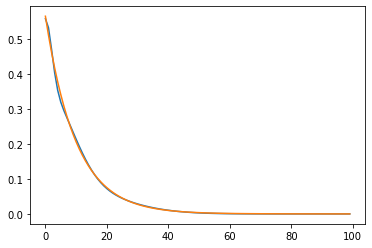

In [289]:
main = '''
CGF = lambda r: {0}
'''.format(str_chi)

exec(main)

x = np.linspace(0,10,100)
plt.plot(CGF(x))
plt.plot(STO_1(x))

In [269]:
solution

array([ 0.00390718, -0.00749698,  0.24923649, -0.03951584,  0.0607042 ,
       -0.00691285, -0.00132911])